In [58]:
import random
from math import pi

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.providers.aer.noise.errors.standard_errors import pauli_error
from qiskit.providers.aer.noise import NoiseModel

In [168]:
def create_xgate_noise_model(p_error):
    noise_model = NoiseModel()

    # Define the error probabilities for X-gate noise
    xgate_error = pauli_error([('X', p_error), ('I', 1 - p_error)])

    # Add X-gate noise to all qubits
    quantum_register_size = 1
    for qubit in range(quantum_register_size):
        noise_model.add_all_qubit_quantum_error(xgate_error, ['x'])
        noise_model.add_all_qubit_quantum_error(xgate_error, ['rx'])

    return noise_model

def create_xyzgate_noise_model(p_error):
    noise_model = NoiseModel()

    # Define the error probabilities for X-gate noise
    x_error = pauli_error([('X', p_error), ('I', 1 - p_error)])
    y_error = pauli_error([('Y', p_error), ('I', 1 - p_error)])
    z_error = pauli_error([('Z', p_error), ('I', 1 - p_error)])

    # Add X-gate noise to all qubits
    quantum_register_size = 1
    for qubit in range(quantum_register_size):
        noise_model.add_all_qubit_quantum_error(x_error, ['rx'])

        # Add Y-gate noise to X-gates
        noise_model.add_all_qubit_quantum_error(y_error, ['rx'], ['ry'])

        # Add Z-gate noise to X-gates
        noise_model.add_all_qubit_quantum_error(z_error, ['rx'], ['rz'])

    return noise_model

In [257]:
# Create an ideal noise model
ideal_noise_model = NoiseModel()
coherent_noise_model = create_xgate_noise_model(0.1)
stochastic_noise_model = create_xyzgate_noise_model(0.05)

# Apply the ideal noise model to the simulator
backend = Aer.get_backend('qasm_simulator')
# backend.set_options(noise_model=ideal_noise_model)
backend.set_options(noise_model=coherent_noise_model)
# backend.set_options(noise_model=stochastic_noise_model)



Total count for 00 and 11 are: {'1': 3026, '0': 6974}


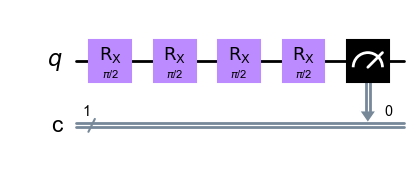

In [258]:
circuit = QuantumCircuit(1, 1)

# Add a H gate on qubit 0

# random_state(circuit)
# rx_with_stohastic(circuit)
# circuit.rx(pi / 20, 0)
circuit.rx(pi / 2, 0)
circuit.rx(pi / 2, 0)
circuit.rx(pi / 2, 0)
circuit.rx(pi / 2, 0)
# circuit.rx(pi / 2, 0)
# circuit.rx(pi, 0)

# Map the quantum measurement to the classical bits
circuit.measure(0, 0)

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, backend, optimization_level=0)

# Execute the circuit on the aer simulator
job = backend.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw("mpl")


In [255]:
counts

{'1': 2885, '0': 7115}

In [256]:
counts['0']

7115

In [262]:
def run_circuit(backend):
    circuit = QuantumCircuit(1, 1)

    # Add a H gate on qubit 0

    # random_state(circuit)
    # rx_with_stohastic(circuit)
    # circuit.rx(pi / 20, 0)
    circuit.rx(pi / 2, 0)
    circuit.rx(pi / 2, 0)
    circuit.rx(pi / 2, 0)
    circuit.rx(pi / 2, 0)
    # circuit.rx(pi / 2, 0)
    # circuit.rx(pi, 0)

    # Map the quantum measurement to the classical bits
    circuit.measure(0, 0)

    # Compile the circuit for the support instruction set (basis_gates)
    # and topology (coupling_map) of the backend
    compiled_circuit = transpile(circuit, backend, optimization_level=0)

    # Execute the circuit on the aer simulator
    job = backend.run(compiled_circuit, shots=1000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(compiled_circuit)
    # print("\nTotal count for 00 and 11 are:", counts)

    # Draw the circuit
    circuit.draw("mpl")

    return counts['0']/1000

In [270]:
backend = Aer.get_backend('qasm_simulator')
backend.set_options(noise_model=coherent_noise_model)
coherent_results = [run_circuit(backend) for _ in range(5000)]
backend = Aer.get_backend('qasm_simulator')
backend.set_options(noise_model=stochastic_noise_model)
stochastic_results = [run_circuit(backend) for _ in range(5000)]

In [265]:
coherent_results

[0.68,
 0.7,
 0.69,
 0.67,
 0.68,
 0.75,
 0.75,
 0.63,
 0.73,
 0.71,
 0.63,
 0.7,
 0.67,
 0.78,
 0.72,
 0.76,
 0.78,
 0.67,
 0.75,
 0.68,
 0.69,
 0.67,
 0.73,
 0.68,
 0.73,
 0.69,
 0.67,
 0.64,
 0.68,
 0.74,
 0.66,
 0.68,
 0.75,
 0.73,
 0.66,
 0.72,
 0.75,
 0.78,
 0.73,
 0.68,
 0.75,
 0.7,
 0.77,
 0.72,
 0.75,
 0.68,
 0.69,
 0.67,
 0.74,
 0.64,
 0.75,
 0.67,
 0.69,
 0.69,
 0.73,
 0.72,
 0.72,
 0.7,
 0.74,
 0.74,
 0.76,
 0.69,
 0.69,
 0.75,
 0.71,
 0.65,
 0.76,
 0.67,
 0.68,
 0.71,
 0.65,
 0.69,
 0.75,
 0.67,
 0.7,
 0.7,
 0.8,
 0.65,
 0.71,
 0.69,
 0.7,
 0.61,
 0.65,
 0.73,
 0.65,
 0.63,
 0.74,
 0.72,
 0.7,
 0.71,
 0.68,
 0.73,
 0.71,
 0.69,
 0.62,
 0.69,
 0.73,
 0.79,
 0.55,
 0.7,
 0.68,
 0.69,
 0.75,
 0.69,
 0.75,
 0.72,
 0.76,
 0.61,
 0.74,
 0.66,
 0.77,
 0.81,
 0.66,
 0.8,
 0.71,
 0.8,
 0.64,
 0.65,
 0.7,
 0.69,
 0.7,
 0.73,
 0.75,
 0.71,
 0.73,
 0.71,
 0.7,
 0.74,
 0.67,
 0.76,
 0.73,
 0.61,
 0.72,
 0.71,
 0.73,
 0.71,
 0.71,
 0.59,
 0.64,
 0.65,
 0.74,
 0.64,
 0.76,
 0.72,
 0.71,


In [271]:
import statistics

def print_distribution_properties(data):
    # Calculate properties
    mean = statistics.mean(data)
    median = statistics.median(data)
    mode = statistics.mode(data)
    variance = statistics.variance(data)
    stdev = statistics.stdev(data)
    min_value = min(data)
    max_value = max(data)

    # Print properties
    print("Distribution Properties:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {stdev}")
    print(f"Minimum Value: {min_value}")
    print(f"Maximum Value: {max_value}")

In [272]:
print_distribution_properties(coherent_results)
print()
print_distribution_properties(stochastic_results)

Distribution Properties:
Mean: 0.703348
Median: 0.7
Mode: 0.71
Variance: 0.002103331562312462
Standard Deviation: 0.0458620928688657
Minimum Value: 0.55
Maximum Value: 0.86

Distribution Properties:
Mean: 0.714682
Median: 0.72
Mode: 0.71
Variance: 0.0020187826325265053
Standard Deviation: 0.0449308650320301
Minimum Value: 0.54
Maximum Value: 0.85


In [273]:
def write_numbers_to_file(numbers, filename):
    with open(filename, 'w') as file:
        for number in numbers:
            file.write(str(number) + '\n')
write_numbers_to_file(coherent_results, "coherent.txt")
write_numbers_to_file(stochastic_results, "stochastic.txt")